In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('titanic')


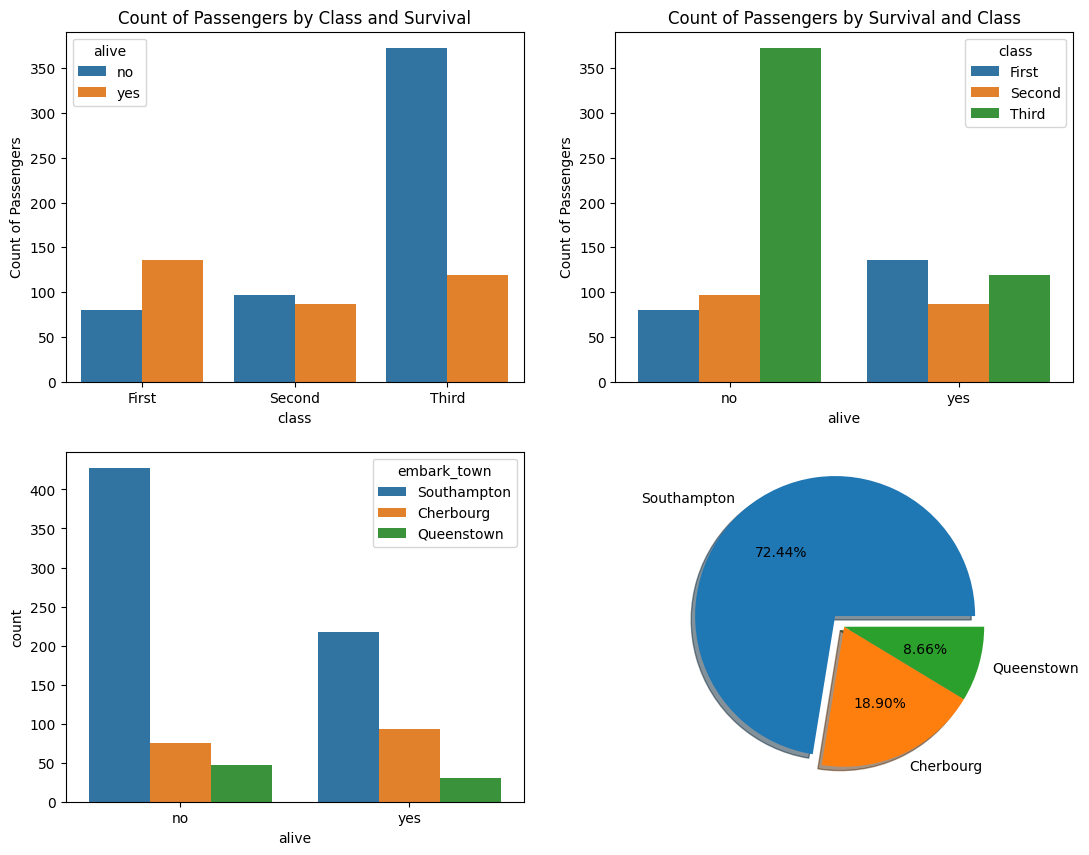

In [3]:
plt.figure(figsize=(13, 10))
plt.subplot(2,2,1)
sns.countplot(x='class', hue='alive', data=df)
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers by Class and Survival')

plt.subplot(2,2,2)
sns.countplot(x='alive', hue='class', data=df)
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers by Survival and Class')

plt.subplot(2,2,3)
sns.countplot(x='alive', hue='embark_town', data=df)

plt.subplot(2,2,4)
x = df['embark_town'].value_counts().values
labels = df.embark_town.value_counts().index

plt.pie(x=x, labels=labels,autopct='%.2f%%',shadow=True,explode=(0.1,0,0))

plt.show()


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\sarod\AppData\Local\Temp\ipykernel_10308\889274036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].agg(['min','max','median']).plot(kind='bar',subplots=True,figsize=(10,8))


array([<Axes: title={'center': 'min'}, xlabel='class'>,
       <Axes: title={'center': 'max'}, xlabel='class'>,
       <Axes: title={'center': 'median'}, xlabel='class'>], dtype=object)

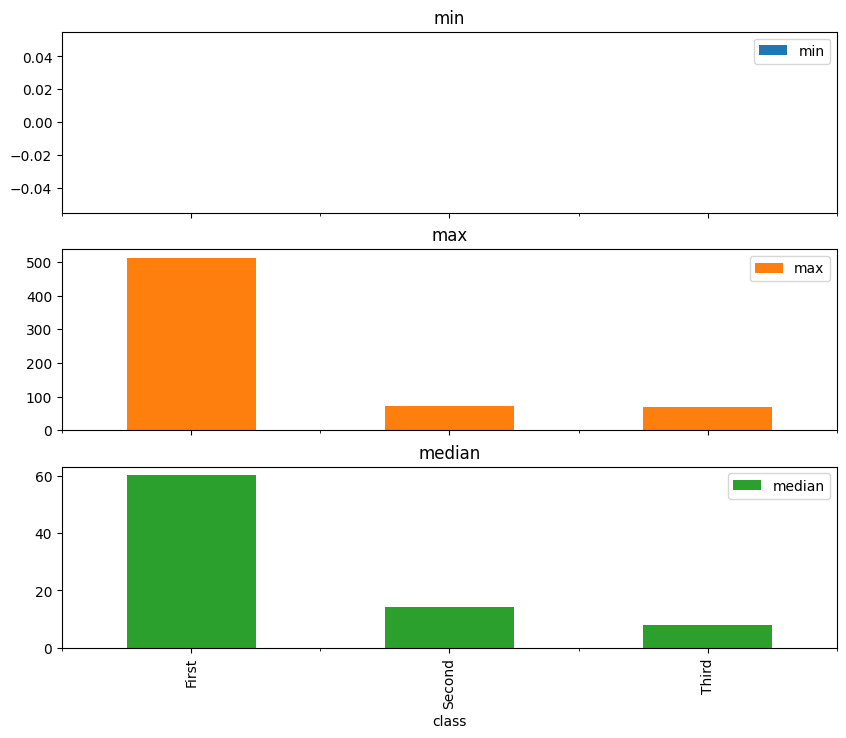

In [5]:
df.groupby('class')['fare'].agg(['min','max','median']).plot(kind='bar',subplots=True,figsize=(10,8))

array([<Axes: title={'center': 'min'}, xlabel='sex'>,
       <Axes: title={'center': 'max'}, xlabel='sex'>,
       <Axes: title={'center': 'median'}, xlabel='sex'>], dtype=object)

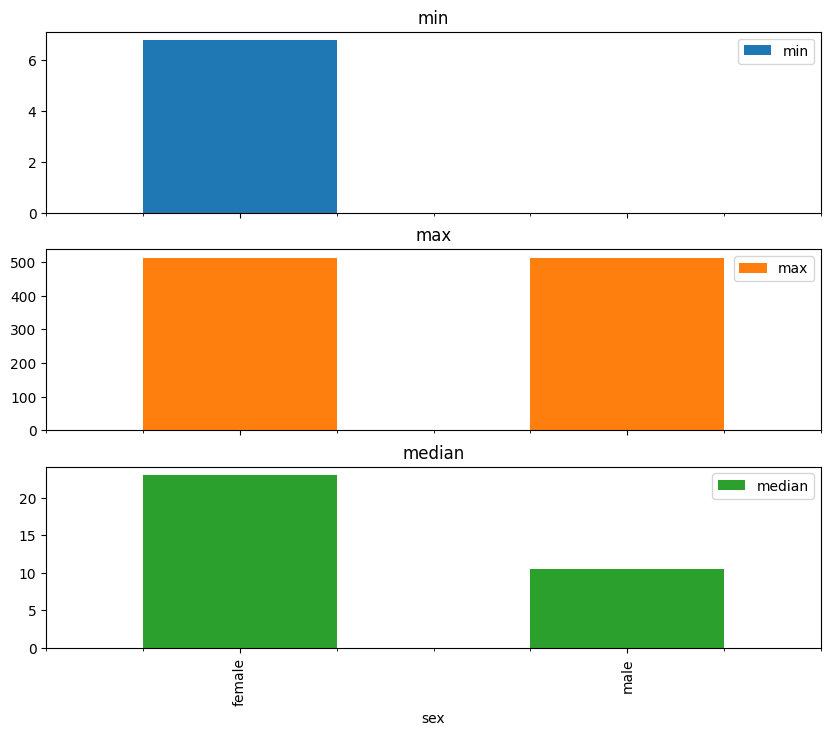

In [6]:
df.groupby('sex')['fare'].agg(['min','max','median']).plot(kind='bar',subplots=True,figsize=(10,8))


<Axes: xlabel='alive', ylabel='count'>

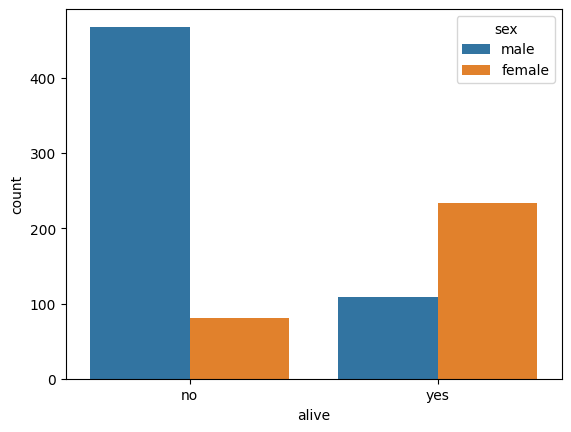

In [7]:
sns.countplot(x='alive', hue='sex',data=df)

* ### Note: The minimum value for first is zero hence the first graph is empty 

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

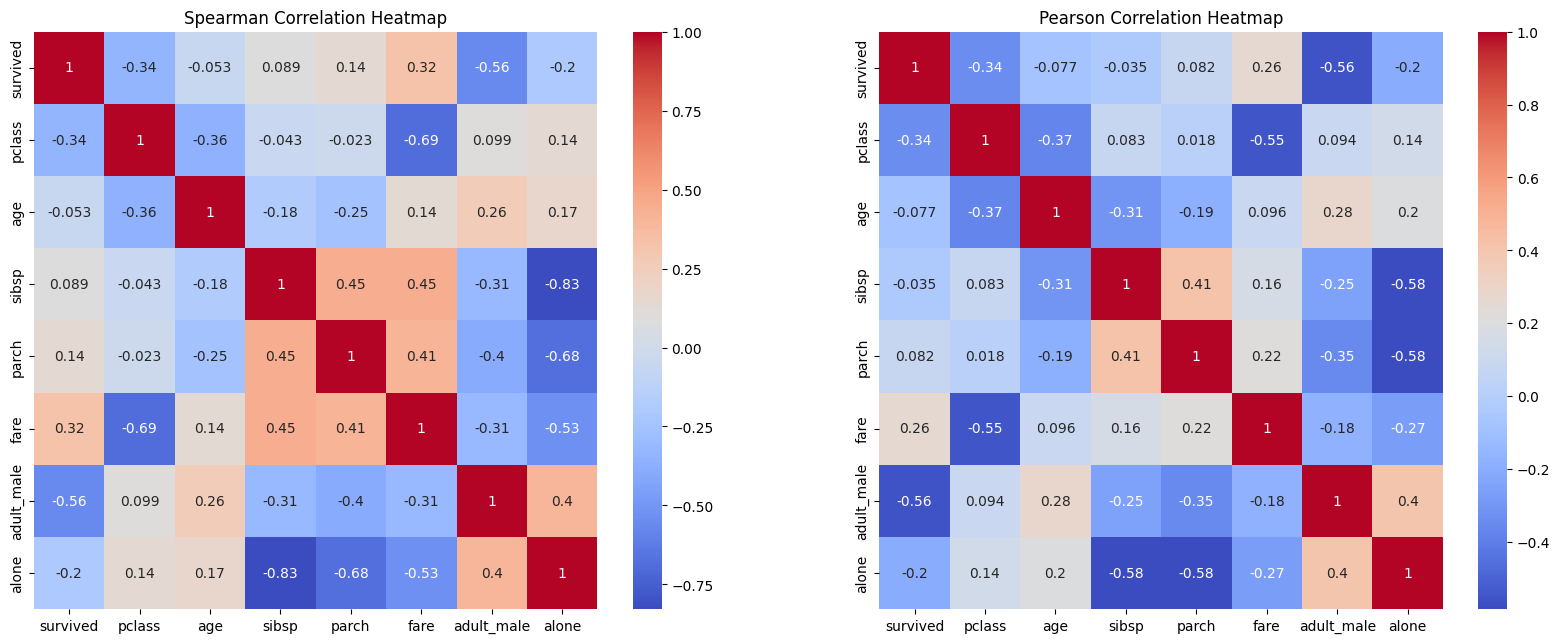

In [9]:
plt.figure(figsize=(20,7.5))

plt.subplot(1,2,1)
sns.heatmap(df.corr(method='spearman',numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')

plt.subplot(1,2,2)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')

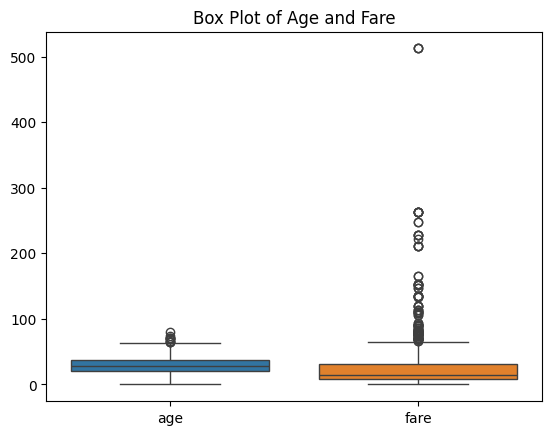

In [10]:
sns.boxplot(data=df[['age', 'fare']])
plt.title('Box Plot of Age and Fare')
plt.show()

In [11]:
df = df.drop(columns=['embarked','who','adult_male','alive'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['survived'], axis=1), df['survived'], test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Label Encoding on sex and alone feature

le1 = LabelEncoder()
le2 = LabelEncoder()

X_train['sex'] = le1.fit_transform(X_train['sex'])
X_test['sex'] = le2.fit_transform(X_test['sex'])

le3 = LabelEncoder()
le4 = LabelEncoder()

X_train['alone'] = le1.fit_transform(X_train['alone'])
X_test['alone'] = le2.fit_transform(X_test['alone'])

In [15]:
X_train['deck'] = X_train['deck'].cat.add_categories('Unknown')
X_test['deck'] = X_test['deck'].cat.add_categories('Unknown')

X_train['deck'] = X_train['deck'].fillna('Unknown')
X_test['deck'] = X_test['deck'].fillna('Unknown')


In [16]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(strategy='median')
si2 = SimpleImputer(strategy='median')

X_train['age'] = si1.fit_transform(X_train[['age']])
X_test['age'] = si2.fit_transform(X_test[['age']])

In [17]:
X_train.embark_town = X_train.embark_town.fillna('Southampton')

In [18]:
class_map = {
    'Third': 0,
    'Second': 1,
    'First': 2
}

X_train['class'] = X_train['class'].map(class_map)
X_test['class'] = X_test['class'].map(class_map)

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe1 = OneHotEncoder(drop='first',sparse_output=False)
ohe2 = OneHotEncoder(drop='first',sparse_output=False)

cols = ['deck','embark_town']
encoding = ohe1.fit_transform(X_train[cols])
df = pd.DataFrame(encoding, columns=ohe1.get_feature_names_out(cols),index=X_train.index)
X_train = pd.concat([X_train.drop(columns=cols),df],axis=1)

cols = ['deck','embark_town']
encoding = ohe2.fit_transform(X_test[cols])
df1 = pd.DataFrame(encoding, columns=ohe1.get_feature_names_out(cols),index=X_test.index)
X_test = pd.concat([X_test.drop(columns=cols),df1],axis=1)

In [20]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,class,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Queenstown,embark_town_Southampton
331,1,1,45.5,0,0,28.5000,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
733,2,1,23.0,0,0,13.0000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
382,3,1,32.0,0,0,7.9250,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
704,3,1,26.0,1,0,7.8542,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
813,3,0,6.0,4,2,31.2750,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,class,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Queenstown,embark_town_Southampton
709,3,1,29.0,1,1,15.2458,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
439,2,1,31.0,0,0,10.5000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
840,3,1,20.0,0,0,7.9250,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
720,2,0,6.0,0,1,33.0000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
39,3,0,14.0,1,0,11.2417,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameters
xgb_params = {
    'n_estimators': [100,200,300],
    'max_depth': [1,2,3,4],
    'learning_rate': [0.1, 0.001],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'random_state': [10,42]
}

# Train XGBoost model
xgb = GridSearchCV(
    estimator= XGBClassifier(enable_categorical=True),
    param_grid=xgb_params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb)

array([[94, 11],
       [18, 56]], dtype=int64)